In [94]:
original = {'a': 1, 'b': 0}

# Create multiple independent copies using dictionary comprehension
copy1 = {k: v for k, v in original.items()}
copy2 = {k: v for k, v in original.items()}
copy3 = {k: v for k, v in original.items()}

# Modify the nested list in copy1
copy1['b'] = (4)

# The modification affects all copies, including the original, because the nested list is shared
print(original)  # Output: {'a': 1, 'b': [2, 3, 4]}
print(copy1)     # Output: {'a': 1, 'b': [2, 3, 4]}
print(copy2)     # Output: {'a': 1, 'b': [2, 3, 4]}
print(copy3)     # Output: {'a': 1, 'b': [2, 3, 4]}
print(7*0.0625,)

{'a': 1, 'b': 0}
{'a': 1, 'b': 4}
{'a': 1, 'b': 0}
{'a': 1, 'b': 0}
0.4375


In [100]:
from fractions import Fraction 
def num_to_mixed_frac(num: float) -> str:

    """Convert a Fraction into a mixed number string."""
    frac = Fraction(num).limit_denominator()

    whole_part = frac.numerator // frac.denominator
    remainder = frac.numerator % frac.denominator
    if remainder == 0:
        # e.g. Fraction(2, 1) -> "2"
        return str(whole_part)
    else:
        # e.g. Fraction(3, 2) -> "1 1/2"
        return f"{whole_part} {remainder}/{frac.denominator}"
DURATION_MAP = {
    '0': 2.0,  # Special case; longa
    '1': 1.0,  # Whole note
    '2': 0.5,  # Half note
    '4': 0.25,
    '8': 0.125,
    '16': 0.0625,
    '32': 0.03125, 
}
TRIPLET_DURATION_MAP = {
    '3': 0.333,
    '6': 0.166,
}
TIME_SIGNATURE_NORMALIZATION_MAP = {
    1: 4,
    2: 2,
    4: 1,
    8: 0.5,
}

timesigs = [(2, 1), (2, 4), (4, 4), (3, 4), (3,2)]
offsets =       [
    [0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75],

    [0, 0.0625, 0.125, 0.1875, 0.25, 0.3125, 0.375, 0.4375], 
    [0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875],
    [0, 0.25, 0.5],
    [0, 0.5, 1.0]
]
correct_beats = [
    [1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75],
    
    [1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75],
    [1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5],
    [1, 2, 3],
    [1, 2, 3]
]

calculated_beats = []
for idx, time_sig in enumerate(timesigs):
    numerator, denominator = time_sig
    offset = offsets[idx]
    # cur_correct_beats = correct_beats[idx]
    whole_note_count = DURATION_MAP[str(denominator)] * numerator
    #print(f"In {enumerator}/{denominator}: whole_note_count: {whole_note_count}")

    cur_beats = []
    for o in offset:
        # beat_position = 1+ o * enumerator # * denominator #/ denominator 
        
        beat_position = 1+ o / DURATION_MAP[str(denominator)] 
        beat_position = (float(beat_position))

        beat_in_quarters = 5

        cur_beats.append(beat_position)
    calculated_beats.append(cur_beats)

for idx, (calculated, correct) in enumerate(zip(calculated_beats, correct_beats)):
    if correct == calculated:
       print(f"\u2714\ufe0f {[num_to_mixed_frac(c) for c in calculated]}", end='\n\n')
    else:
        print(f"off:  {offsets[idx]} \ncalc: {calculated} \ncorr: {correct}", end='\n\n')

✔️ ['1', '1 1/4', '1 1/2', '1 3/4', '2', '2 1/4', '2 1/2', '2 3/4']

✔️ ['1', '1 1/4', '1 1/2', '1 3/4', '2', '2 1/4', '2 1/2', '2 3/4']

✔️ ['1', '1 1/2', '2', '2 1/2', '3', '3 1/2', '4', '4 1/2']

✔️ ['1', '2', '3']

✔️ ['1', '2', '3']



In [102]:
res = []

for idx, (time_sig, calculated, correct) in enumerate(zip(timesigs, calculated_beats, correct_beats)):
    numerator, denominator = time_sig
    num_quarters = numerator * (4 / denominator)

    #new = [ (4/numerator) * (c-1) for c in calculated ]
    new = [ (TIME_SIGNATURE_NORMALIZATION_MAP[denominator]) * (c-1) +1 for c in calculated ]
    # 
    as_if_44 = new

    res.append(as_if_44)

for idx, r in enumerate(res):
    print(f"{timesigs[idx][0]}/{timesigs[idx][1]}: {r}")

    

2/1: [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]
2/4: [1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75]
4/4: [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5]
3/4: [1.0, 2.0, 3.0]
3/2: [1.0, 3.0, 5.0]


In [105]:
test = [False, False]
if any(test):
    print(1)
else:
    print(0)

0


**Conclusion: music21 cannot effectively detect each note in a dimished 7th chord as the chord root.**

In [93]:
from music21 import chord, pitch, interval
from itertools import permutations

def determine_chord_names_and_roots(notes, consider_enharmonics=False):
    """
    Determine all possible chord names and their roots from a list of notes, considering all inversions,
    and optionally considering each note as a potential root with their enharmonic equivalents.

    Args:
        notes (list of str): List of musical notes (e.g., ['C', 'E', 'G', 'B']).
        consider_enharmonics (bool): If True, consider enharmonic equivalents for each permutation of notes.

    Returns:
        set: A set containing tuples of chord names and their root notes without octave information.
    """
    possible_chords = set()

    if consider_enharmonics:
        # Convert notes to Pitch objects to manage enharmonics
        pitches = [pitch.Pitch(n) for n in notes]
        
        # Explicitly set each note as root and analyze
        for i in range(len(pitches)):
            # Rotate the pitch list to put each note at the front
            rotated_pitches = pitches[i:] + pitches[:i]

            # Set the first note in the rotated list to a lower octave
            rotated_pitches[0].octave = 2
            for j in range(1, len(rotated_pitches)):
                rotated_pitches[j].octave = 4

            # print(rotated_pitches)

        ch = chord.Chord(rotated_pitches)

        chord_name = ch.commonName
        root_note = ch.root().name  # Get the root note from music21's perspective
        possible_chords.add((chord_name, root_note))
    else:
        # Normal operation without enharmonic consideration
        ch = chord.Chord(notes)
        # ch.closedPosition(forceOctave=4)  # Normalize the chord

        chord_name = ch.commonName
        root_note = ch.root().name
        possible_chords.add((chord_name, root_note))

    return possible_chords

# Example usage
enhar_flag = False
if True:
    notes0 = ['G', 'D', 'C']
    # notes0 = ['C', 'E-', 'Gb', 'B--']
    notes1 = ['E-', 'Gb', 'B--', 'C']
    notes1 = ['E-', 'Gb', 'B--', 'C']
    notes2 = ['E', 'C', 'G', 'C#', 'E#', 'G#']
    notes3 = ['C', 'E', 'G', 'B', 'D-']

    # enhar_flag = True
    print(determine_chord_names_and_roots(notes0, consider_enharmonics=enhar_flag))
    print(determine_chord_names_and_roots(notes1, consider_enharmonics=enhar_flag))
    print(determine_chord_names_and_roots(notes2, consider_enharmonics=enhar_flag))
    print(determine_chord_names_and_roots(notes3, consider_enharmonics=enhar_flag))




{('quartal trichord', 'C')}
{('diminished seventh chord', 'C')}
{('forte class 6-19B', 'C')}
{('diminished pentacluster', 'C')}


In [ ]:
# assuming pitch-class (so no spelling information)

# # treat each note as root once
# for note, idx in pcs:
#     # so shift all notes such that the root has pitchclass 0
#     shifted_pcs = [pc - note for pc in pcs]

#     other_tones = shifted_pcs.remove(idx)
#     // maybe sort here

#     # Look for thirds

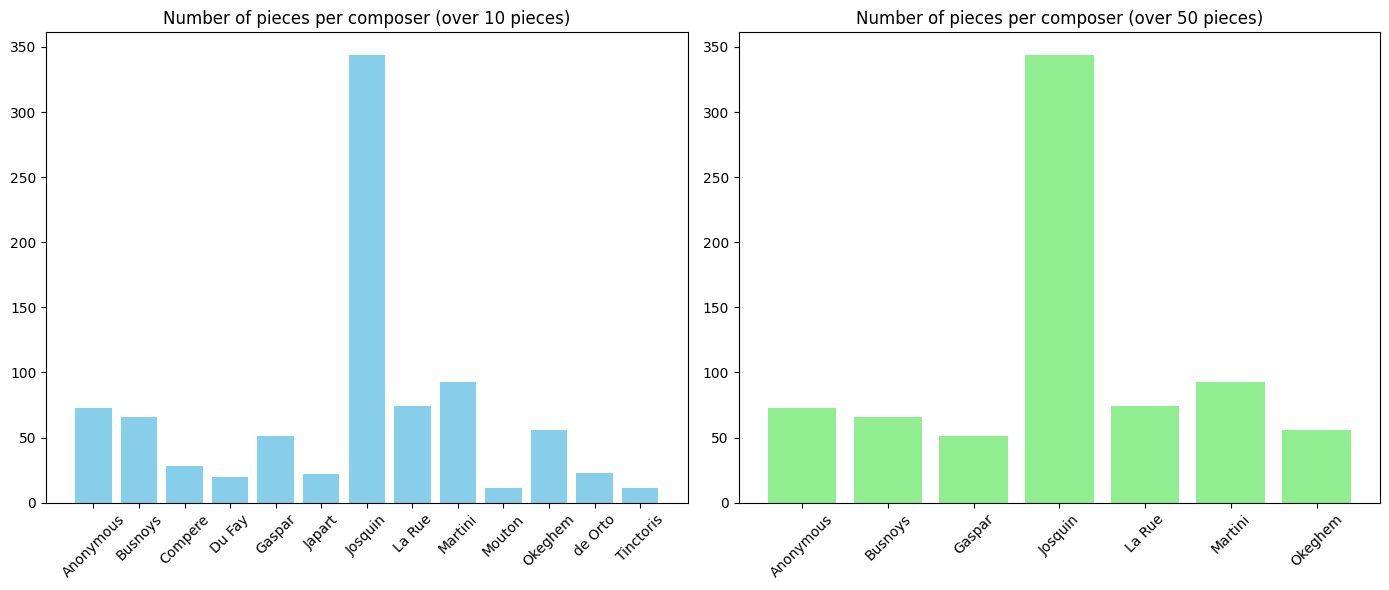

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

composer_data = {
    "Anonymous": 73,
    "Agricola": 4,
    "Binchois": 2,
    "Brumel": 3,
    "Busnoys": 66,
    "Compere": 28,
    "Daser": 1,
    "Du Fay": 20,
    "Févin": 1,
    "Frye": 2,
    "Gaspar": 51,
    "Isaac": 5,
    "Japart": 22,
    "Josquin": 344,
    "La Rue": 74,
    "Martini": 93,
    "Mouton": 11,
    "Obrecht": 7,
    "Okeghem": 56,
    "de Orto": 23,
    "Pipelare": 1,
    "Regis": 4,
    "Tinctoris": 11
}


# Filter composers with more than 10 pieces
filtered_composers = {composer: count for composer, count in composer_data.items() if count >= 10}
# Filter composers with more than 50 pieces
high_output_composers = {composer: count for composer, count in composer_data.items() if count > 50}


# Use seaborn color palette
sns.set_palette("pastel")

# Define colors from seaborn palette
colors = sns.color_palette("muted", n_colors=5)
color1 = colors[0]  # Muted blue
color2 = colors[2]  # Muted green

# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# First plot: all composers with more than 10 pieces
axs[0].bar(filtered_composers.keys(), filtered_composers.values(), color='skyblue')
# axs[0].set_xlabel('Composer')
# axs[0].set_ylabel('Number of pieces')
axs[0].set_title('Number of pieces per composer (over 10 pieces)')
axs[0].tick_params(axis='x', rotation=45)

# Second plot: composers with more than 50 pieces
axs[1].bar(high_output_composers.keys(), high_output_composers.values(), color='lightgreen')
# axs[1].set_ylabel('Number of pieces')
axs[1].set_title('Number of pieces per composer (over 50 pieces)')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

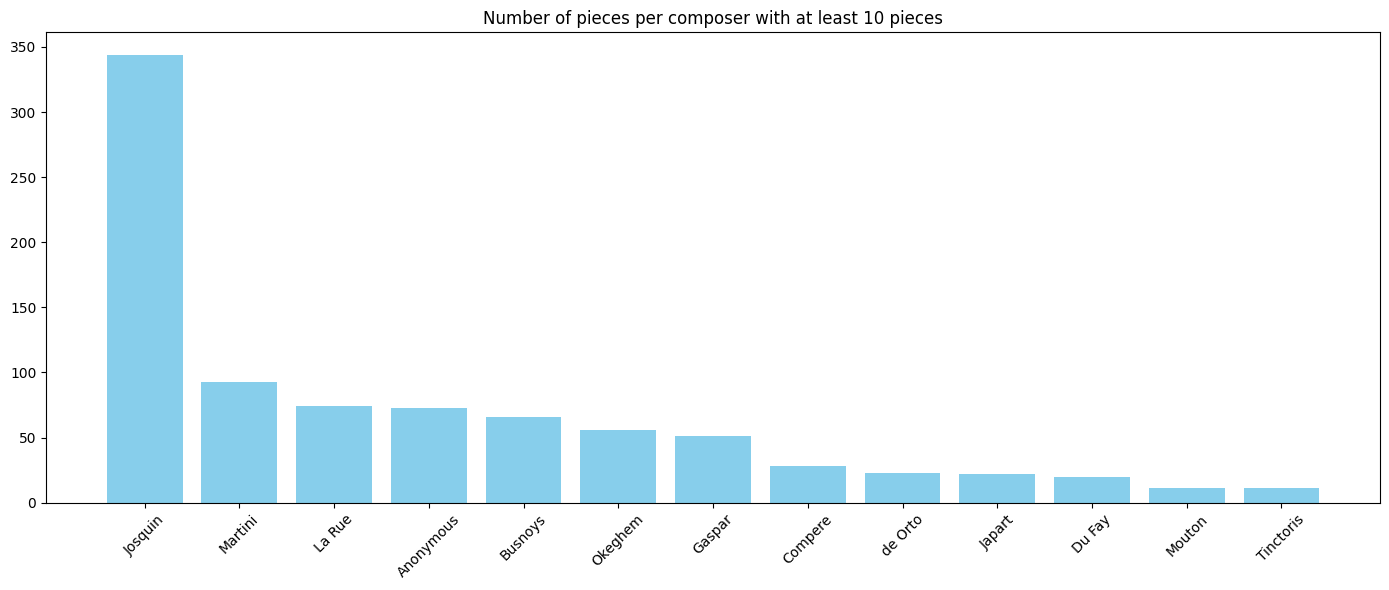

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

composer_data = {
    "Anonymous": 73,
    "Agricola": 4,
    "Binchois": 2,
    "Brumel": 3,
    "Busnoys": 66,
    "Compere": 28,
    "Daser": 1,
    "Du Fay": 20,
    "Févin": 1,
    "Frye": 2,
    "Gaspar": 51,
    "Isaac": 5,
    "Japart": 22,
    "Josquin": 344,
    "La Rue": 74,
    "Martini": 93,
    "Mouton": 11,
    "Obrecht": 7,
    "Okeghem": 56,
    "de Orto": 23,
    "Pipelare": 1,
    "Regis": 4,
    "Tinctoris": 11
}

# Filter composers with at least 10 pieces
count_lim = 10
filtered_composers = {composer: count for composer, count in composer_data.items() if count >= count_lim}

# Order composers by frequency (descending order)
sorted_composers = dict(sorted(filtered_composers.items(), key=lambda x: x[1], reverse=True))

# Set seaborn color palette
sns.set_palette("pastel")

# Create a single plot with ordered composers
fig, ax = plt.subplots(figsize=(14, 6))
ax.bar(sorted_composers.keys(), sorted_composers.values(), color='skyblue')
ax.set_title(f'Number of pieces per composer with at least {count_lim} pieces')
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()